# Labb 2 - Pandas och data processing

Vi hör mycket i media om att Sveriges PISA-resultat blir sämre och att svenska skolan tappar i kunskapsnivå. Låt oss
undersöka lite närmre hur det ser ut med hjälp av nationella prov i årskurs 9.
Skolverket har samlat mycket statistik kring nationella proven i årskurs 9 som vi kommer att analysera vidare.

***Uppgifter***

Alla grafer ska exporteras till en undermapp som heter visualiseringar i ditt repo för labben. Exportera matplotlib grafer
i png-format och plotly-grafer som html-filer. Ge relevanta namn till dina filer så det blir lätt att referera till dem.
Tänk på data storytelling, graferna du skapar ska ha lämpliga rubriker, labels, annoteringar mm.

***Uppgift 1***

I den här uppgiften ska du visualisera med hjälp av matplotlib

- a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena (engelska, matematik, svenska,
svenska som andraspråk). Ändra kolumnnamnen på respektive dataframe så du får något liknande som nedan.

Plats Huvudman Totalt
(A-F)
Flickor
(A-F)
Pojkar
(A-F)
Totalt
(A-E)
Flickor
(A-E)
Pojkar
(A-E)
Totalt
(poäng)
Flickor
(poäng)
Pojkar
(poäng)
0 Riket Samtliga 93225 45800 47425 96.1 97.9 94.4 13.6 14.5 12.7
1 Riket Kommunal 72771 35484 37287 95.7 97.6 93.8 13.3 14.3 12.4
2 Riket Enskild 20414 10297 10117 97.6 98.7 96.6 14.4 15.2 13.5
3 Riket Skolverket 40 19 21 100 100 100 15 15.9 14.2

- b) För de olika ämnena, rita en stapeldiagram på totala poängen för de olika huvudmännen. Placera alla diagram i en
plott med subplottar


In [ ]:
# I den här uppgiften ska du visualisera med hjälp av matplotlib

# - a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena (engelska, matematik, svenska,
# svenska som andraspråk). Ändra kolumnnamnen på respektive dataframe så du får något liknande som nedan.

import matplotlib.pyplot as plt
import pandas as pd

# Lägger till en lista för att enkelt hämta ut dom sheet names jag vill ha och lägga till i en lista med hjälp av list comprehention
subjects = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]

# Hämtar ut dataframe från rad 8 och framåt för att hoppa över onödiga NaN-värden
df_list = [pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name=sub, header=[8]) for sub in subjects]

# Skapar en lista som innehåller alla columnnamn som jag vill byta till
column_names = ["Plats","Huvudman","Totalt (A-F)","Flickor (A-F)","Pojkar (A-F)","Totalt (A-E)","Flickor (A-E)","Totalt (A-E)","Totalt (Poäng)","Flickor (Poäng)", "Pojkar (Poäng)"]

# Byter ut alla tidigare kolumnnamn mot dom nya från column_names-listan
# Byter ut ".." mot 0, för att få med en 4e bar för "Svenska som andraspråk", så att barplotsen blir symetriska
for df in df_list:
    df.columns = column_names
    df.replace("..", 0, inplace=True)

df_list[3]



,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Totalt (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963,5495,6468,75.9,80,72.4,9,9.9,8.3
2,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12,10.4
3,Riket,Skolverket,0,0,0,0,0,0,0,0,0


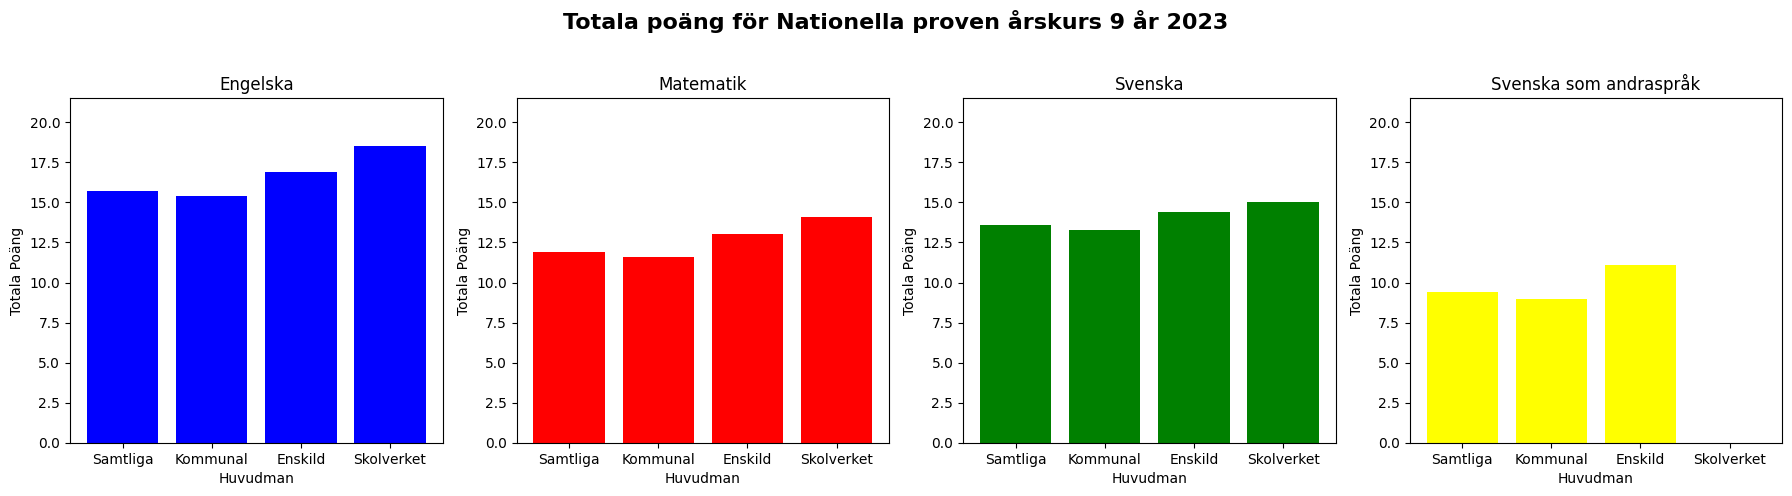

In [ ]:

# - b) För de olika ämnena, rita en stapeldiagram på totala poängen för de olika huvudmännen. Placera alla diagram i en
# plott med subplottar

# Hämtar ut maxvärdet för alla "Totalt (Poäng)" för att använda till ylim, för mer symetriska barplots
max_points = max(df["Totalt (Poäng)"].max() for df in df_list)
max_points

# Lägger till en lista med färger för tydligare skillnad mellan dom olika barplotsen
colours = ["blue", "red", "green", "yellow"]

# Skapar en subplot med storleken av df_list
fig, axes = plt.subplots(1,len(df_list), figsize=(18,5))

# Loopar igenom och zipar ihop alla listor för att använda dessa ihop
for ax, sub, df, color in zip(axes,subjects,df_list,colours):
    # Justerar varje ax med ny titel, och labels
    ax.set(
        title=sub, 
        ylabel="Totala Poäng",
        xlabel="Huvudman",
        ylim=(0,max_points+3),
    )
    # Plottar varje ax med unik färg
    ax.bar(df["Huvudman"],df["Totalt (Poäng)"], color=color)

# Lägger till en titel för hela figuren
fig.suptitle("Totala poäng för Nationella proven årskurs 9 år 2023", fontsize=16, fontweight="bold")
plt.tight_layout(pad=1)

fig.savefig("visualiseringar/barplot_nationella.png")


In [225]:
#Kan man läsa in alla samtidigt på ett smidigare sätt?
# df_engelska = pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name="Engelska", header=[8])
# df_matte = pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name="Matematik", header=[8])
# df_svenska = pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name="Svenska", header=[8])
# df_andraspråk = pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name="Svenska som andraspråk", header=[8])
# # df_andraspråk = df_andraspråk.drop(index=3)

# df_andraspråk

# df_dict = {
#     "Engelska": pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name="Engelska", header=[8]),
#     "Matematik": pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name="Matematik", header=[8]),
#     "Svenska": pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name="Svenska", header=[8]),
#     "Svenska som andrahandsspråk": pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name="Svenska som andraspråk", header=[8]),
# }
# df = pd.DataFrame(df_dict)
# df


# for i in range(len(column_names)):
    # df_engelska = df_engelska.rename(
    #     columns={
    #         df_engelska.columns[i]: column_names[i]
    #     }
    # )
    # df_matte = df_matte.rename(
    #     columns={
    #         df_matte.columns[i]: column_names[i]
    #     }
    # )
    # df_svenska = df_svenska.rename(
    #     columns={
    #         df_svenska.columns[i]: column_names[i]
    #     }
    # )
    # df_andraspråk = df_andraspråk.rename(
    #     columns={
    #         df_andraspråk.columns[i]: column_names[i]
    #     }
    # )

# df_engelska = df_engelska.rename(
#     columns={
#         df_engelska.columns[0]: "Plats",
#         df_engelska.columns[1]: "Huvudman",
#         df_engelska.columns[2]: "Totalt (A-F)",
#         df_engelska.columns[3]: "Flickor (A-F)",
#         df_engelska.columns[4]: "Pojkar (A-F)",
#         df_engelska.columns[5]: "Totalt (A-E)",
#         df_engelska.columns[6]: "Flickor (A-E)",
#         df_engelska.columns[7]: "Totalt (A-E)",
#         df_engelska.columns[8]: "Totalt (Poäng)",
#         df_engelska.columns[9]: "Flickor (Poäng)",
#         df_engelska.columns[10]: "Pojkar (Poäng)",
#     }
# )

# column_names = ["Plats","Huvudman","Totalt (A-F)","Flickor (A-F)","Pojkar (A-F)","Totalt (A-E)","Flickor (A-E)","Totalt (A-E)","Totalt (Poäng)","Flickor (Poäng)", "Pojkar (Poäng)"]
# df_sheet_list = [df_engelska, df_matte, df_svenska, df_andraspråk]

# #vill man ha dom i en lista eller som separata dataframes?
# for y in range(len(df_sheet_list)):
#     for i in range(len(column_names)):
#         df_sheet_list[y] = df_sheet_list[y].rename(
#             columns={
#                 df_sheet_list[y].columns[i]: column_names[i]
#             }
#         )
        
# for df in df_sheet_list:
#     df.columns = column_names

# df_engelska = df_sheet_list[0]
# df_matte = df_sheet_list[1]
# df_svenska = df_sheet_list[2]
# df_andraspråk = df_sheet_list[3]

# df_sheet_list[0]
# df_engelska

# df_dict = {
#     "Engelska": pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name="Engelska", header=[8]),
#     "Matematik": df_matte,
#     "Svenska": df_svenska,
#     "Svenska som andrahandsspråk": df_andraspråk,
# }

# df_dict["Engelska"] #[""]

# ax_list = [ax1,ax2,ax3,ax4]



# for i in range(len(df_sheet_list)):
#     x = [df_sheet_list[i].get("Huvudman")]
#     y= [df_sheet_list[i].get("Totalt (Poäng)")]
# ax2.set(title="Matematik")
# ax3.set(title="Svenska")
# ax4.set(title="Andraspråk")
# fig.text(0.4,1,"Totala poäng för Nationella proven årskurs 9 år 2023\n")

# titles = ["Engelska", "Matematik", "Svenska", "Andraspråk"]

# for i in range(4):
#     axes[i].set(
#         title=subjects[i], 
#         ylabel="Totala Poäng",
#         xlabel="Huvudman",
#         ylim=(0,20),
#     )
#     axes[i].bar(df_list[i]["Huvudman"],df_list[i]["Totalt (Poäng)"], color=colours[i])

# ax2.bar(df_matte["Huvudman"],df_matte["Totalt (Poäng)"])
# ax3.bar(df_svenska["Huvudman"],df_svenska["Totalt (Poäng)"])
# ax4.bar(df_andraspråk["Huvudman"],df_andraspråk["Totalt (Poäng)"])
# for ax in ax_list:
#     ax.set_ylim(0, 20)  # Sätter samma y-max och y-min på alla grafer
# plt.show()
# {i}
# x = [df_sheet_list[0].get("Huvudman")]
# y = [df_sheet_list[0].get("Totalt (Poäng)")]
# y